
# Project: Investigate a Dataset - TMDb Movie Data Analysis.
##  (10,000 movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about around more 100,00 movies, including columns such as title, director, cast, genres, and production companies.
It also includes financial details like budget, revenue, and adjusted figures to account for inflation, with popularity and user ratings. This data offers insights into trends across the movie industry, such as the most popular genres, changes in budget over time, and relationships between popularity, revenue, and other factors. 


### Question(s) for Analysis
 1. What are the most popular movie genres ?
 2. Average Movie Budget Over The Years ?
 3. What is Average Movie Budget for Comic Book Movies (DC/Marvel) Over the Years?
 4. Who are the top 10 most prolific directors in terms of the number of movies directed?
 5. What is the relationship between user ratings (vote_average) and popularity?
 6. What is the percentage of movies each year that had a higher-than-average revenue compared to all movies in the dataset?

In [2]:
# import libs and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import operator
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df=pd.read_csv("./Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### More information about the dataset

In [4]:
# shape of Data
'Number of rows: (' +  str(df.shape[0]) + '), Number of columns (' +  str(df.shape[1]) + ')'

'Number of rows: (10866), Number of columns (21)'

In [5]:
# Genres values count
df.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [6]:
# current cloumns for null and missing values and data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### From above table we can enhance data as:
> 1- release_date must be datatime<br>
> 2- We can resize the data size by change int64 to int16<br>
> 3- Null values should be replaced by zero for int and float data types<br>
> 4- We need to check if data has dublicated rows

In [7]:
#fined if the data has any duplicates rows
'The sum of number of dublicate rows: (' + str(df.duplicated().sum()) + '), We will remove dubicate in clean step' 

'The sum of number of dublicate rows: (1), We will remove dubicate in clean step'

In [8]:
#Show the columns which have a null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Get the number of unique values by Movies Name ( original_title column )
'We have only ' + str(df.original_title.nunique()) + ' of ' + str(df.shape[0]) + ' title, we have ' + str(df.shape[0] - df.original_title.nunique()) +  ' movies has same title '

'We have only 10571 of 10866 title, we have 295 movies has same title '

In [10]:
# describe data to show more information
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



## Data Cleaning
> To prepare the data for analysis, we’ll start by cleaning it. This process includes removing duplicate entries, optimizing data types, filling or handling null values, and dropping unnecessary columns.

### 1- Drop unused cloumns

In [11]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['id','homepage', 'imdb_id', 'tagline','overview'])

In [12]:
df_clean.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'keywords', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### 2- Remove Dublication 

In [13]:
df_clean.drop_duplicates(inplace=True)

In [14]:
'The sum of number of dublicate rows: ' + str(df_clean.duplicated().sum())

'The sum of number of dublicate rows: 0'

### v3- Fxied data types

In [15]:
df_clean.release_date=pd.to_datetime(df_clean.release_date, errors='coerce')

In [16]:
df_clean.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [17]:
# Drop any missing values like NANs in cast and genres
df_clean = df_clean[df_clean["cast"].isnull() == False]
df_clean = df_clean[df_clean["genres"].isnull() == False]

In [18]:
df_clean.original_title.nunique()

10475

In [19]:
df.original_title.nunique()

10571

In [20]:
df_clean = df_clean[df_clean.budget_adj != 0]
df_clean = df_clean[df_clean.revenue_adj != 0]
df_clean.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df_clean.sample(10)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8304,0.420957,3705538,62548947,The Crying Game,Stephen Rea|Jaye Davidson|Miranda Richardson|F...,Neil Jordan,transvestism|gay|hostage|love of one's life|no...,112,Romance|Crime|Drama|Thriller,Miramax Films|Channel Four Films|Palace Pictur...,1992-09-02,67,6.7,1992,5.758496e+06,9.720258e+07
649,4.930820,30000000,174600318,The Grand Budapest Hotel,Ralph Fiennes|Tony Revolori|F. Murray Abraham|...,Wes Anderson,hotel|painting|wartime|gunfight|theft,99,Comedy|Drama,Fox Searchlight Pictures|Scott Rudin Productio...,2014-02-26,2802,7.9,2014,2.763273e+07,1.608228e+08
7017,1.131654,33000000,54700105,The Punisher,Thomas Jane|John Travolta|Will Patton|Roy Sche...,Jonathan Hensleigh,chain|submachine gun|undercover|smuggling|twin...,124,Action|Crime|Drama,Lions Gate Films|VIP 3 Medienfonds|Valhalla Mo...,2004-04-15,402,6.0,2004,3.809670e+07,6.314828e+07
698,2.160156,20000000,11110975,Inherent Vice,Joaquin Phoenix|Josh Brolin|Owen Wilson|Kather...,Paul Thomas Anderson,based on novel|1970s|private investigator|smok...,148,Comedy|Romance|Crime|Drama|Mystery,Ghoulardi Film Company|Warner Bros.,2014-12-25,552,6.3,2014,1.842182e+07,1.023422e+07
10491,0.889306,20000000,77200000,The Name of the Rose,Sean Connery|Christian Slater|Helmut Qualtinge...,Jean-Jacques Annaud,christianity|library|inquisition|monk|poison,130,Drama|Thriller|Mystery,Zweites Deutsches Fernsehen (ZDF)|Les Films Ar...,1986-09-24,363,7.0,1986,3.978813e+07,1.535822e+08
4526,0.588080,10000000,9636289,Seeking a Friend for the End of the World,Steve Carell|Keira Knightley|Connie Britton|Ad...,Lorene Scafaria,asteroid|road trip|end of the world|woman dire...,101,Drama|Comedy|Romance|Science Fiction,Mandate Pictures|Indian Paintbrush|Anonymous C...,2012-06-22,425,6.2,2012,9.497443e+06,9.152010e+06
6680,0.638444,11000000,72778712,Jackass Number Two,Johnny Knoxville|Bam Margera|Steve-O|Chris Pon...,Jeff Tremaine,wound|disgust|pain|stunt|stuntman,95,Action|Comedy|Documentary,Paramount Pictures,2006-09-22,180,6.4,2006,1.189836e+07,7.872249e+07
9618,0.721427,25000000,16057580,Over the Top,Sylvester Stallone|Robert Loggia|Rick Zumwalt|...,Menahem Golan,sport|bad father-in-law|Â armwrestling,93,Action|Drama,Cannon Group|Golan-Globus|Warner Bros.,1987-02-13,182,5.4,1987,4.797701e+07,3.081579e+07
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
8079,1.847583,60000000,187436818,Heat,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,Michael Mann,gambling|suicide attempt|burglar|booties|detec...,171,Action|Crime|Drama|Thriller,Regency Enterprises|Forward Pass|Warner Bros.,1995-12-15,1104,7.5,1995,8.585801e+07,2.682159e+08


In [22]:
df_clean.original_title.nunique()

3804

In [23]:
df_clean.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192661,3.724027e+07,1.077897e+08,109.228831,528.252727,6.168597,2001.260000,4.428320e+07,1.371986e+08
std,1.475527,4.221487e+07,1.766015e+08,19.924053,880.258758,0.794616,11.284699,4.481243e+07,2.161832e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463201,1.000000e+07,1.363273e+07,95.250000,71.000000,5.700000,1995.000000,1.314346e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
df_clean.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  1
keywords                137
runtime                   0
genres                    0
production_companies     44
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

### 4- Remove 0 revenu, runtime, budget

In [25]:
df_clean = df_clean[df_clean['budget']!=0]

In [26]:
df_clean = df_clean[df_clean['runtime']!=0]

In [27]:
df_clean = df_clean[df_clean['revenue']!=0]

In [28]:
df_clean.original_title.nunique()

3804

<a id='eda'></a>
## Exploratory Data Analysis




### Q1 : What are the most popular movie genres?

In [29]:
genres = df_clean['genres'].dropna().str.split('|').explode()
top_genres = genres.value_counts().head(10)
top_genres

Drama              1754
Comedy             1358
Thriller           1203
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Name: genres, dtype: int64

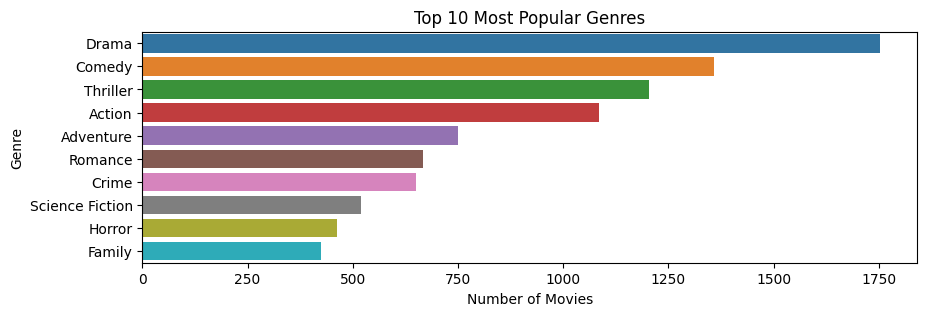

In [30]:
top_genres = genres.value_counts().head(10)

# Plot for the most popular genres
plt.figure(figsize=(10, 3))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Popular Genres")
plt.show()


### Reasoning:

The bar chart shows that Drama and Comedy are the most prevalent genres in this dataset, followed by Thriller and Action. This could indicate a high demand for these genres or a focus on producing films that cater to broad audience preferences.
<hr>

### Q2: Average Movie Budget Over The Years ?

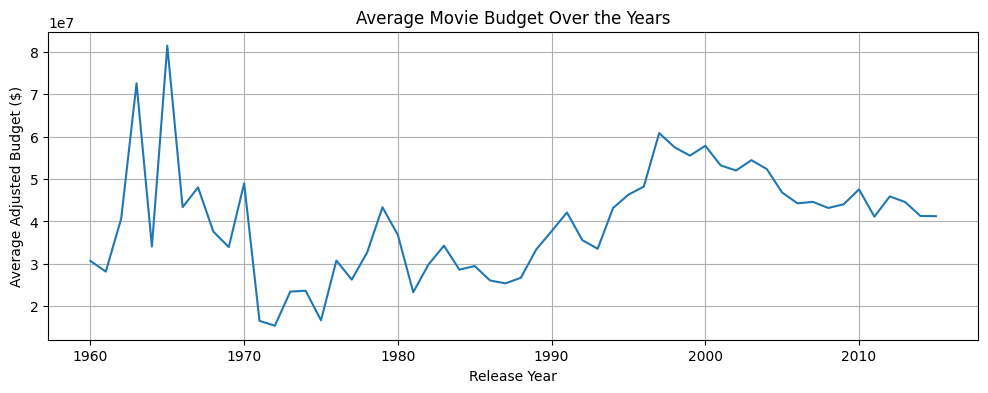

release_year
2006    4.425382e+07
2007    4.459692e+07
2008    4.316507e+07
2009    4.403133e+07
2010    4.754572e+07
2011    4.112172e+07
2012    4.588481e+07
2013    4.455479e+07
2014    4.127475e+07
2015    4.123195e+07
Name: budget_adj, dtype: float64

In [31]:
# Group by release year and calculate the mean adjusted budget
average_budget_per_year = df_clean.groupby('release_year')['budget_adj'].mean()

# Plot for average movie budget over the years
plt.figure(figsize=(12, 4))
plt.plot(average_budget_per_year.index, average_budget_per_year.values)
plt.xlabel("Release Year")
plt.ylabel("Average Adjusted Budget ($)")
plt.title("Average Movie Budget Over the Years")
plt.grid(True)
plt.show()

# Display the last 10 years as a summary
average_budget_per_year.tail(10)

### Reasoning:

The line plot illustrates a general downward trend in average movie budgets from 2006 to 2015. This decline may reflect shifts in production strategies, such as more efficient resource allocation or a rise in lower-budget films. Another possible explanation could be the increased popularity of digital effects (CGI) and advancements in technology, which may lower production costs over time while still allowing high-quality output.

<hr>

### Q3: What is Average Movie Budget for Comic Book Movies (DC/Marvel) Over the Years?


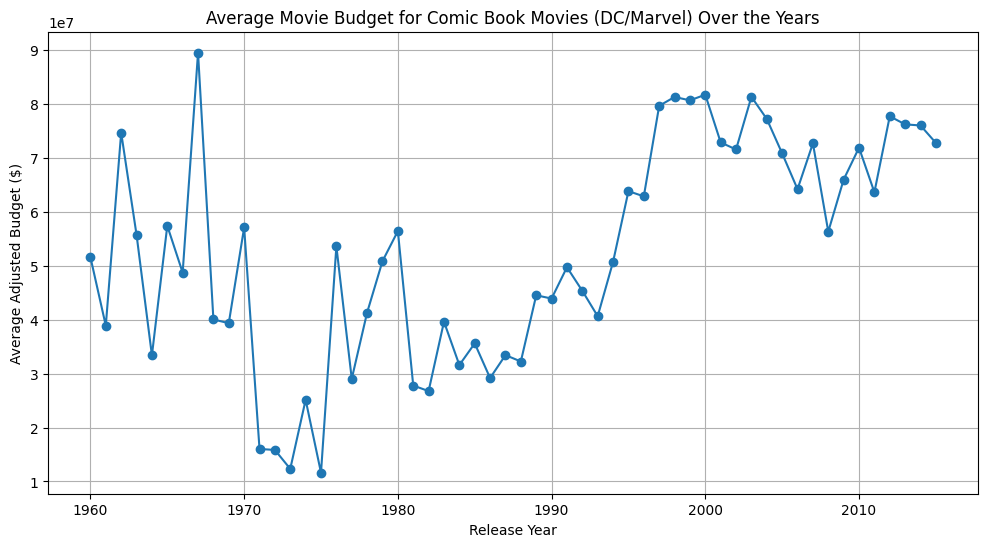

release_year
2006    6.423451e+07
2007    7.273840e+07
2008    5.635566e+07
2009    6.601051e+07
2010    7.193133e+07
2011    6.365647e+07
2012    7.776061e+07
2013    7.625577e+07
2014    7.605542e+07
2015    7.281797e+07
Name: budget_adj, dtype: float64

In [32]:
# Filtering for movies with DC or Marvel in the production company or title
comic_movies = df_clean[
    df_clean['production_companies'].fillna('').str.contains('Marvel|DC', case=False) |
    df_clean['original_title'].fillna('').str.contains('Marvel|DC', case=False) |
    df_clean['genres'].fillna('').str.contains('Action|Adventure|Fantasy|Science Fiction', case=False)
]

# Group by release year to find the average budget for these comic movies
comic_movie_budgets = comic_movies.groupby('release_year')['budget_adj'].mean()

# Plotting the trend for comic book movies over the years
plt.figure(figsize=(12, 6))
plt.plot(comic_movie_budgets.index, comic_movie_budgets.values, marker='o')
plt.xlabel("Release Year")
plt.ylabel("Average Adjusted Budget ($)")
plt.title("Average Movie Budget for Comic Book Movies (DC/Marvel) Over the Years")
plt.grid(True)
plt.show()

comic_movie_budgets.tail(10)  # Display the last 10 years as a summary

### Reasoning:

Comic book movies, especially from DC and Marvel, tend to have higher-than-average budgets due to the need for extensive CGI, action sequences, and star casts. However, the slight decrease in average budget over time might be due to optimized CGI technology, which allows for high-quality visuals at reduced costs. 

<hr>

### Q4: Who are the top 10 most prolific directors in terms of the number of movies directed?

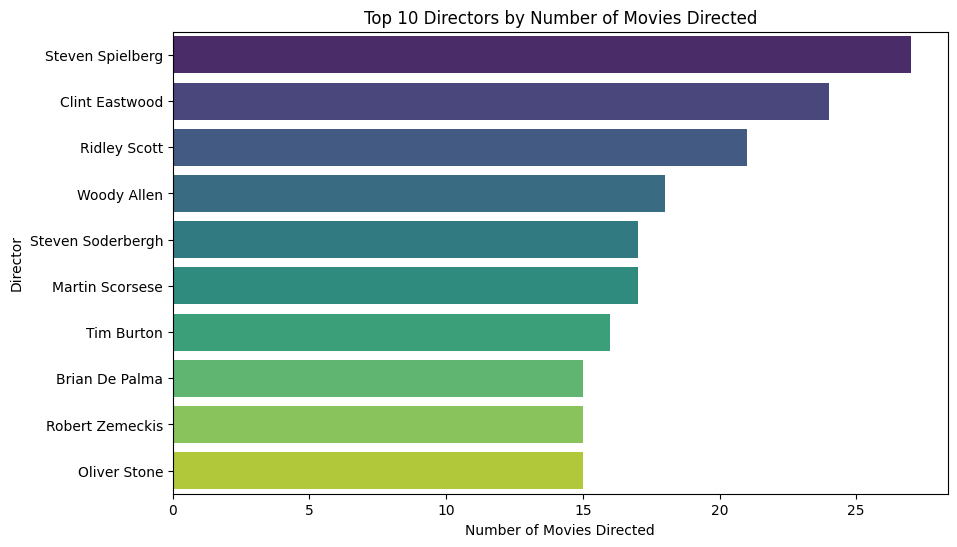

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Martin Scorsese      17
Tim Burton           16
Brian De Palma       15
Robert Zemeckis      15
Oliver Stone         15
Name: director, dtype: int64

In [33]:
# Count occurrences of each director and get the top 10
top_10_directors = df_clean['director'].value_counts().head(10)

# Plot the top 10 directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="viridis")
plt.xlabel("Number of Movies Directed")
plt.ylabel("Director")
plt.title("Top 10 Directors by Number of Movies Directed")
plt.show()
top_10_directors

### Reasoning:

Directors like Steven Spielberg, Clint Eastwood, and Ridley Scott  appear at the top, likely due to long, active careers in the industry.Their high output may also be attributed to their ability to work in various genres or adapt to changing audience preferences, allowing them to remain prominent across decades.
<hr>

### Q5:What is the relationship between user ratings (vote_average) and popularity? 

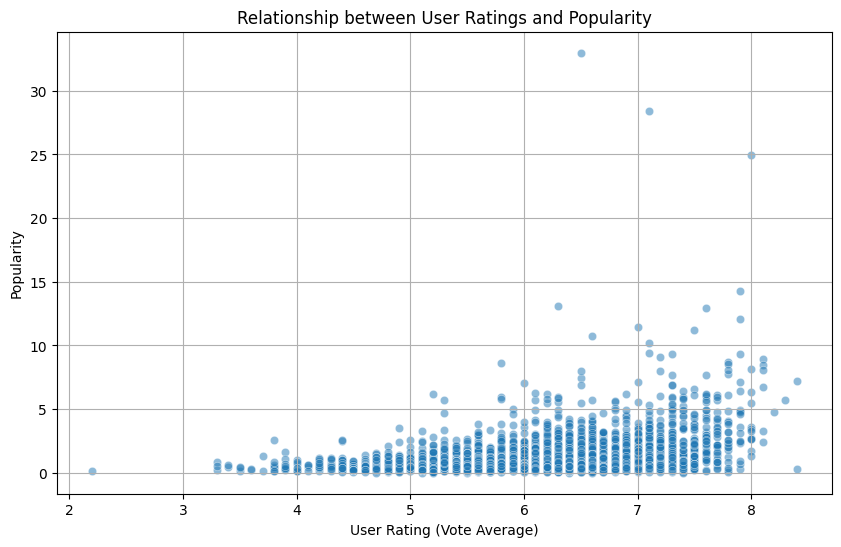

In [34]:

# Scatter plot to examine the relationship between user ratings (vote_average) and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df_clean, alpha=0.5)
plt.xlabel("User Rating (Vote Average)")
plt.ylabel("Popularity")
plt.title("Relationship between User Ratings and Popularity")
plt.grid(True)
plt.show()

### Reasoning:

The scatter plot reveals a positive correlation between user ratings and popularity; movies with higher ratings generally enjoy greater popularity.
<hr>

### Q6:What is the percentage of movies each year that had a higher-than-average revenue compared to all movies in the dataset?

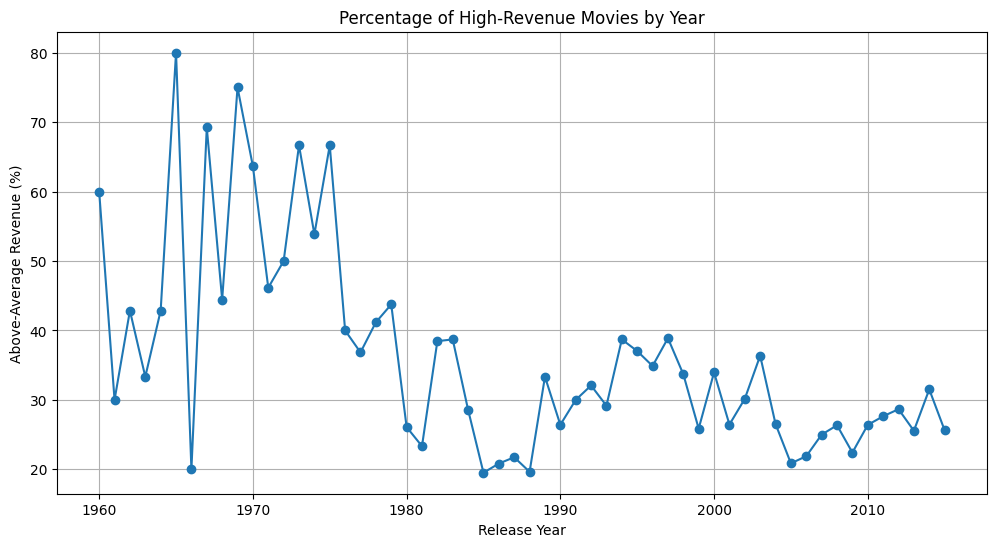

In [35]:
# Calculate the overall mean revenue across all movies
overall_mean_revenue = np.mean(df_clean['revenue_adj'])

# Define a function to calculate the percentage of high-revenue movies for a given year
def percentage_high_revenue(year):
    # Filter the data for the specified year
    year_data = df_clean[df_clean['release_year'] == year]
    
    # Calculate the percentage of movies with revenue above the overall mean
    high_revenue_count = (year_data['revenue_adj'] > overall_mean_revenue).sum()
    total_count = year_data['revenue_adj'].count()
    
    if total_count == 0:  # Avoid division by zero
        return 0
    
    return (high_revenue_count / total_count) * 100

# Calculate the percentage of high-revenue movies for each year
years = sorted(df_clean['release_year'].unique())
high_revenue_percentages = [percentage_high_revenue(year) for year in years]

# Plot the percentage of high-revenue movies by year
plt.figure(figsize=(12, 6))
plt.plot(years, high_revenue_percentages, marker='o')
plt.xlabel("Release Year")
plt.ylabel("Above-Average Revenue (%)")
plt.title("Percentage of High-Revenue Movies by Year")
plt.grid(True)
plt.show()

### Reasoning:

This line plot shows the yearly percentage of movies with revenue above the overall dataset average.
<hr>

<a id='conclusions'></a>
# Conclusions

<hr>

## Summary of Findings

In this analysis, we explored six main questions to uncover insights into trends, financials, and popular aspects of the movie industry using the dataset provided (TMDb Movie Data Analysis - 10,000 movies dataset). Below is a summary of our findings for each question:

#### 1- What are the most popular movie genres?
<strong>Finding:</strong> Certain genres like Drama, Comedy, and Thriller consistently rank as the most popular. 

#### 2- Average Movie Budget Over the Years:
<strong>Finding:</strong> The average movie budget shows a general decline from 2006 to 2015.

#### 3- What is Average Movie Budget for Comic Book Movies (DC/Marvel) Over the Years?
<strong>Finding:</strong> Budgets for comic book movies are generally higher than the industry average but also show a downward trend in recent years.

#### 4- Who are the top 10 most prolific directors in terms of the number of movies directed?
<strong>Finding:</strong> Directors like Steven Spielberg,Clint Eastwood and Ridley Scott  lead the list in terms of the number of movies directed.

#### 5- What is the relationship between user ratings (vote_average) and popularity?
<strong>Finding:</strong> There is a positive correlation between user ratings and popularity, but it is not strictly linear. Higher ratings generally correspond to higher popularity.

#### 6- What is the percentage of movies each year that had a higher-than-average revenue compared to all movies in the dataset?
<strong>Finding:</strong> Each year, a certain percentage of movies exceed the average revenue of the entire dataset. This measure highlights how some movies consistently perform above average, potentially due to factors such as franchise strength, genre appeal, or timing of release.
<hr>

## Limitations of the Analysis

<strong>1- Data Completeness:</strong> Certain columns, like budget and revenue, contain missing or zero values, which limited some analyses.

<strong>2- Dataset Scope:</strong> This dataset does not cover all movies or the entire industry comprehensively. The findings are based on the data available and may not be representative of all production companies, genres, or trends.

<strong>3- Inflation Adjustment:</strong> The adjusted budget_adj and revenue_adj fields do not specify the exact inflation metric used. Slight variations in inflation assumptions could affect year-to-year budget and revenue comparisons.


In [36]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 882213 bytes to Investigate_a_Dataset.html
